In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [15]:
def show(image):
    if len(image.shape) == 3:
        plt.imshow(image[:, :, ::-1])
    else:
        plt.imshow(image, cmap='gray')

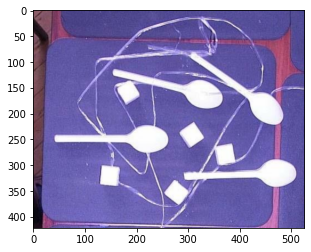

In [16]:
image = cv2.imread('image.png')
show(image)

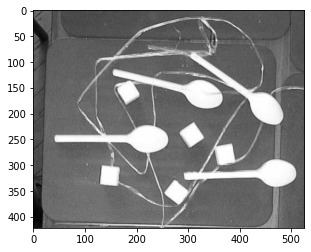

In [17]:
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(image1)

## Бинаризуем изображение и избавляемся от ненужных объектов с помощью морфологического открытия

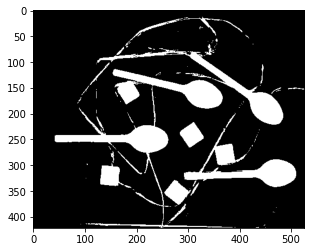

In [19]:
_, image2 = cv2.threshold(image1, 0, 1, cv2.THRESH_OTSU, cv2.CV_32F)
show(image2)

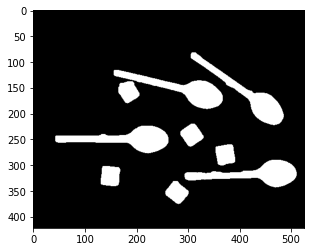

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
image3 = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel)
show(image3)

## Получаем общее количество поиском связных компонент

In [36]:
components_count = cv2.connectedComponents(image3)[0] - 1
print(f'Всего {components_count} ложек и сахара')

Всего 9 ложек и сахара


## Получаем количество отдельно кусочков сахара и ложек с помощью поиска контуров и алгоритма Дугласа-Пекера ($\varepsilon$ зависит от периметра контура)

![Алгоритм Дугласа-Пекера](https://upload.wikimedia.org/wikipedia/commons/3/30/Douglas-Peucker_animated.gif)

Кусочков сахара: 5 (зелёный цвет)
Ложек: 4 (красный цвет)
Синим цветом обозначены вершины контура - результата алгоритма Дугласа-Пекера


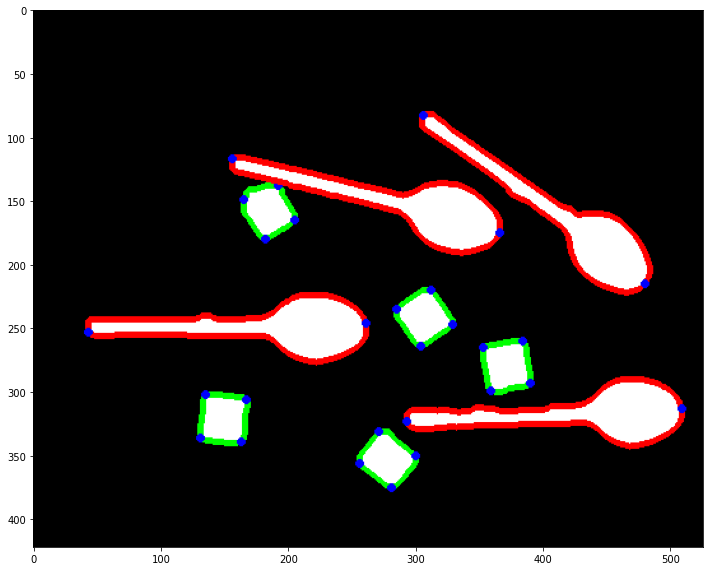

In [139]:
contours = cv2.findContours(image3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
image4 = cv2.cvtColor(image3 * 255, cv2.COLOR_GRAY2BGR)

sugar_count = 0
spoon_count = 0

for contour in contours:
    # Считаем периметр контура и epsilon для алгоритма Дугласа-Пекера.
    epsilon = 0.1 * cv2.arcLength(contour, True)
    approximated_contour = cv2.approxPolyDP(contour, epsilon, True)
    
    # Обозначим сахар зелёным цветом, а ложки - красным.
    if len(approximated_contour) == 4:
        color = (0, 255, 0)
        sugar_count += 1
    else:
        color = (0, 0, 255)
        spoon_count += 1
    
    # Рисуем точный контур нужным цветом.
    for i in range(len(contour)):
        point1 = tuple(contour[i - 1][0])
        point2 = tuple(contour[i][0])
        cv2.line(image4, point1, point2, color, 3)
    
    # Рисуем вершины приближённого контура.
    for i in range(len(approximated_contour)):
        point = tuple(approximated_contour[i][0])
        cv2.circle(image4, point, 2, (255, 0, 0), 2)
        
print(f'Кусочков сахара: {sugar_count} (зелёный цвет)')
print(f'Ложек: {spoon_count} (красный цвет)')
print('Синим цветом обозначены вершины контура - результата алгоритма Дугласа-Пекера')

plt.figure(figsize=(12, 12))
show(image4)